# Final Project - Classification for Determining Heart Disease

Name: Luke Howell

Link to Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

## Exploratory Data Analysis

The dataset I have decided to work with contains the clinical data of 1025 people. The clinical data is split into 13 features, excluding the target variable, and these features are: age, sex, chest pain type (cp) split into 4 values, resting blood pressure (trestbps), serum cholestoral in mg/dl (chol), fasting blood sugar > 120 mg/dl (fbs), resting electrocardiographic results (restecg) split into values of 0,1, and 2, maximum heart rate achieved (thalach), exercise induced angina (exang)  ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca), and thal: 0 for normal, 1 for fixed defect, and 2 for reversable defect. These features will be analyzed for use in predicting the target variable, that is whether the person has no heart disease, indicated by a 0, or has heart disease, indicated by a 1. I found this dataset to be the most appropriate, as it contained the most data points, as well as significant features that could clearly effect the presence of heart disease in a person. Below are the steps I have taken to exploring these features and the dataset, as well as any necessary preprocessing steps.



I will first import the necessary libraries that I will need, which may include some needed in the future, and I will load the dataset.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Heart Disease Dataset
df = pd.read_csv('heart.csv')

As mentioned above, the dataset contains 13 features exlcuding the target variable, and there are 1025 people that this dataset represents.

In [ ]:
# Display a few rows of the dataset
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
334,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
539,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
17,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
717,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


In [ ]:
# Display the shape of the dataset

df.shape

(1025, 14)

All of the features in this dataset contain the maximum number of entries possible, and they are all non-null, indicating that there are no missing values. Also, all of the features that could have been categorical are already in the form of integers, but encoding should still occur, so that will be done later.

In [ ]:
# Display the info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Some more information can be seen below, such as the fact that the average age is around 55, there are more males than females amoung the people being studied, and there were about as many people with heart disease as without it that were apart of this study.

In [ ]:
# Show some statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It can be noted from the pairplots below that although it is not black and white, the features can be used to classify the target value, the presence of heart disease. It should be noted that some of these features seem better at doing so than others. For example, people with a high maximum heart rate (thalach) seem to be more likely to have heart disease.

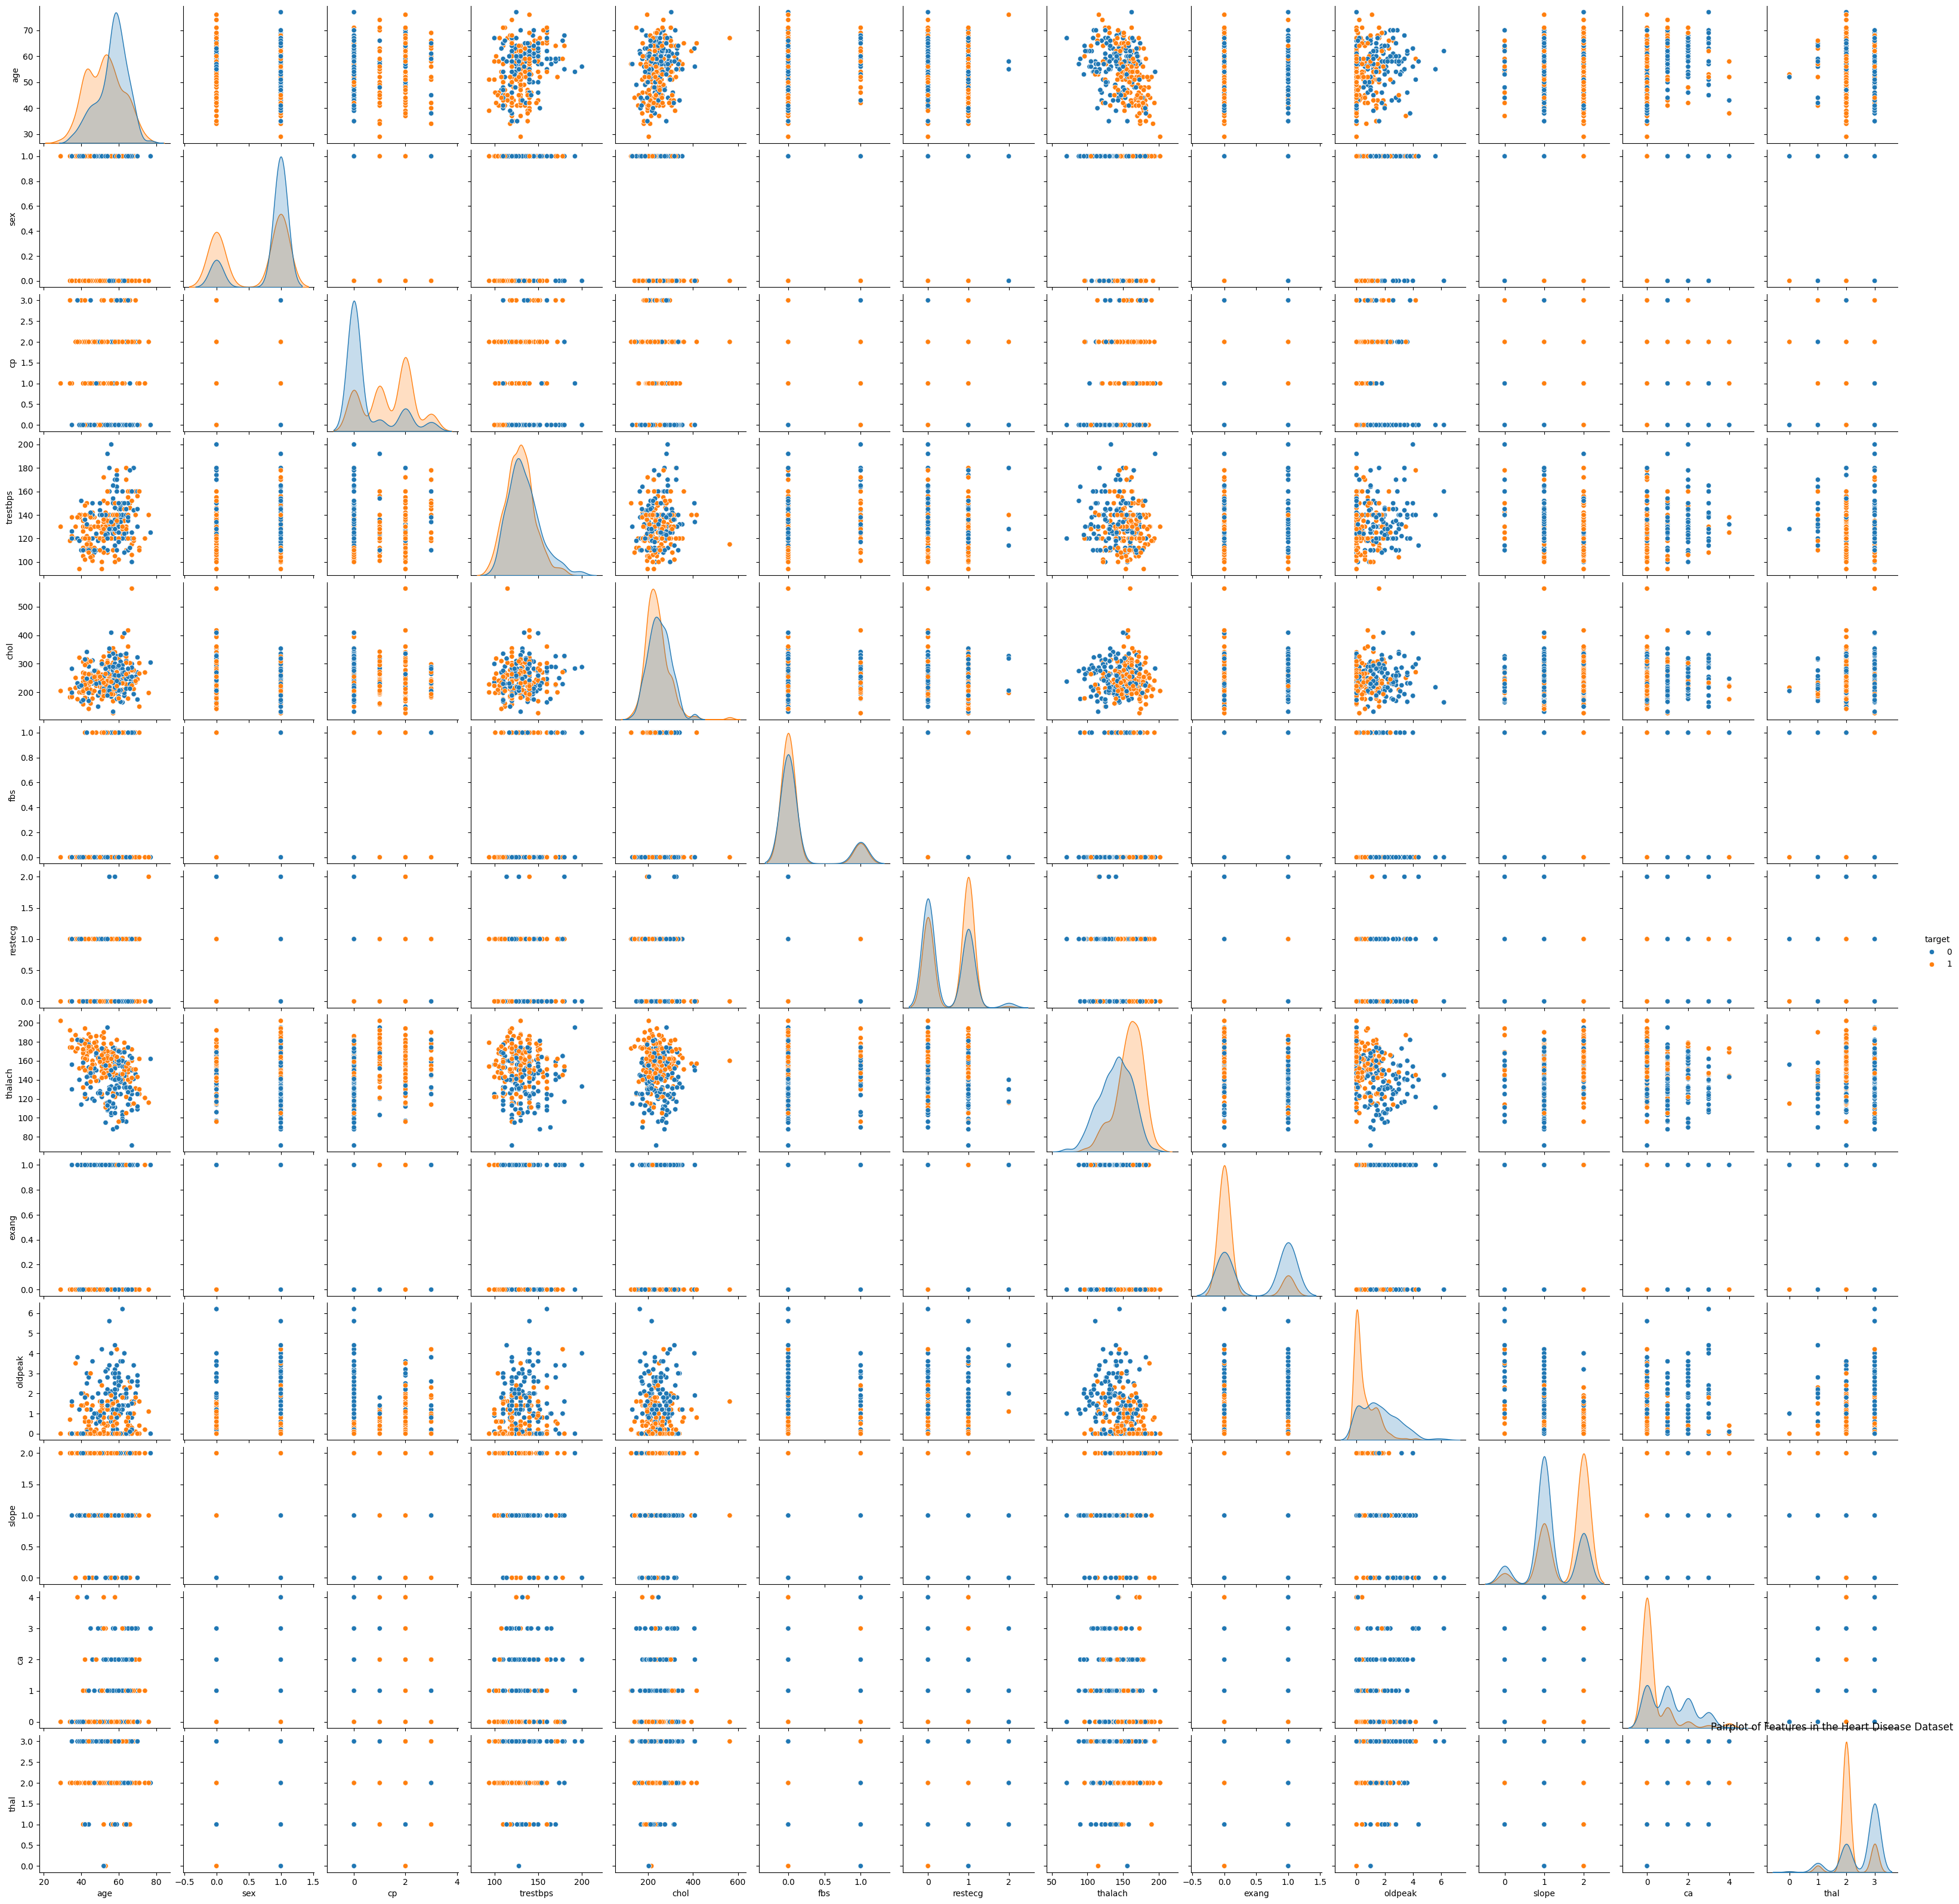

In [ ]:
# Visualizing the distribution of features
sns.pairplot(df, hue='target', vars=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
plt.title('Pairplot of Features in the Heart Disease Dataset')
plt.show()


After analysis for outliers, done using boxplots, it can be seen that resting blood pressure (trestbps) has a few that are close to the maximum of 200 mm Hg, and cholesterol has an extremely high maximum value of 564 mg/dl, the exact number of which can be seen using df.describe(). Oldpeak also has a couple outliers, including a maximum value of 6.2, which is way higher than the average of around 1. Other than that, the data seems to be fairly well distributed. For this reason, I have decided not to do anything to the outliers, such as capping them.

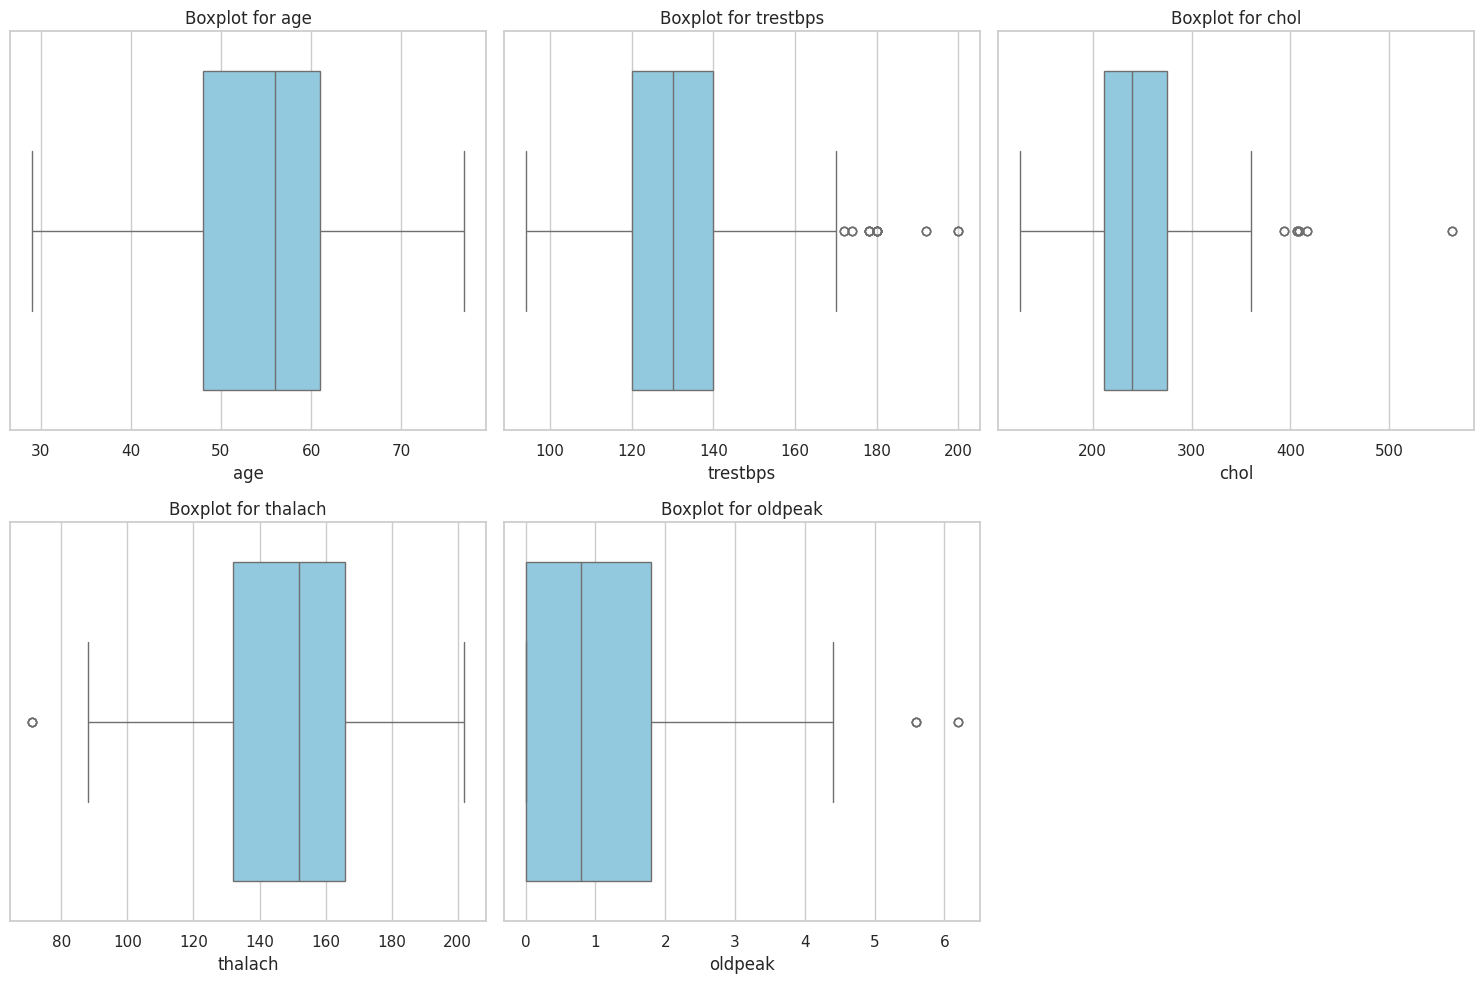

In [ ]:
# Set up a general plotting style
sns.set(style="whitegrid")

# Numerical columns for outlier analysis
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()


A correlation heatmap can be seen below, and it can be noted that features such as chest pain type (cp) and maximum heart rate achieved (thalach) have a moderate level of correlation with the target variable. This is further backed by the pairplots, as it was noted that nothing stood out as really being definitive classifiers.

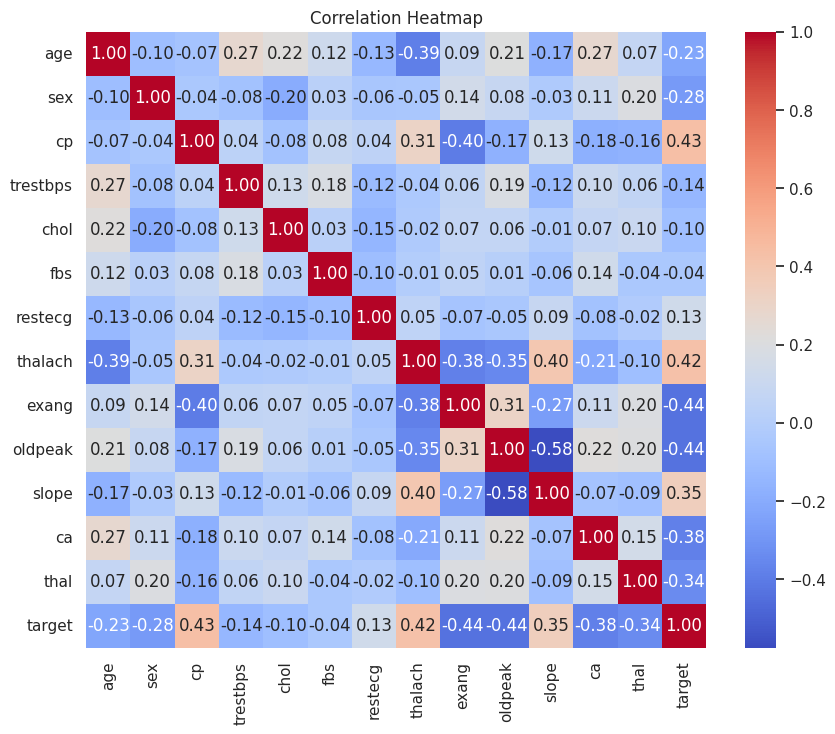

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Upon exploration, I noticed that there were A LOT of duplicated entries within the data, so these are removed as part of preprocessing.

In [ ]:
# Print the number of duplicate entries
print("Number of duplicate entries:", df.duplicated().sum())

# Print a couple of the duplicate entries
print("\nSample of duplicate entries:")
print(df[df.duplicated()].head())

Number of duplicate entries: 723

Sample of duplicate entries:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15   34    0   1       118   210    0        1      192      0      0.7   
31   50    0   1       120   244    0        1      162      0      1.1   
43   46    1   0       120   249    0        0      144      0      0.8   
55   55    1   0       140   217    0        1      111      1      5.6   
61   66    0   2       146   278    0        0      152      0      0.0   

    slope  ca  thal  target  
15      2   0     2       1  
31      2   0     2       1  
43      2   0     3       0  
55      0   0     3       0  
61      1   1     2       1  


In [ ]:
# Remove the duplicate entries

df.drop_duplicates(inplace=True)


Doing so reduced the size of my dataset considerably, as it now only has 302 unique entries instead of the 1025 entries that contained duplicates.

In [ ]:
df.shape

(302, 14)

This may change after further scrutiny and study, but for now, as further preprocessing, I will one hot encode the categorical features, as this may help when training the model.

In [ ]:
# Identify the categorical features and make dummies
categorical_cols = ['sex', 'fbs', 'cp', 'restecg', 'slope', 'thal', 'ca', 'exang']
data = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview encoded columns
print(data.head())

   age  trestbps  chol  thalach  oldpeak  target  sex_1  fbs_1   cp_1   cp_2  \
0   52       125   212      168      1.0       0   True  False  False  False   
1   53       140   203      155      3.1       0   True   True  False  False   
2   70       145   174      125      2.6       0   True  False  False  False   
3   61       148   203      161      0.0       0   True  False  False  False   
4   62       138   294      106      1.9       0  False   True  False  False   

   ...  slope_1  slope_2  thal_1  thal_2  thal_3   ca_1   ca_2   ca_3   ca_4  \
0  ...    False     True   False   False    True  False   True  False  False   
1  ...    False    False   False   False    True  False  False  False  False   
2  ...    False    False   False   False    True  False  False  False  False   
3  ...    False     True   False   False    True   True  False  False  False   
4  ...     True    False   False    True   False  False  False   True  False   

   exang_1  
0    False  
1     True  

As my final preprocessing step, I will normalize the numerical features using feature scaling. Hopefully this will help to make all the inputs way more fairly when training the model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Scale numerical features
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Preview scaling
print(data[numerical_cols].head())

        age  trestbps      chol   thalach   oldpeak
0  0.479167  0.292453  0.196347  0.740458  0.161290
1  0.500000  0.433962  0.175799  0.641221  0.500000
2  0.854167  0.481132  0.109589  0.412214  0.419355
3  0.666667  0.509434  0.175799  0.687023  0.000000
4  0.687500  0.415094  0.383562  0.267176  0.306452


### EDA and Preprocessing Summary

After performing Exploratory Data Analysis, my dataset that initially contained 1025 entries and 13 features was lowered to 302 entries after removing duplicates. The 13 features stayed the same, but they were identified under different categories. The numerical features: age, trestbps, chol, thalach, oldpeak, and the categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal. These are the features that will be used to classify the target variable, the presence of heart disease in a patient. None of the entries in the dataset had missing values, but things such as feature relationships, outliers, and correlations were noted. From the pairplot, it was noted that features maximum heart rate achieved (thalach) and chest pain type (cp) were more significant when classifying the target variable, and this was supported further through the correlation heatmap. Outliers were noted for some numerical features such as cholesterol (chol), resting blood pressure (trestbps), and oldpeak. It was decided to leave these outliers in because there were minimal occurences of them. For preprocessing, after removing the duplicates as mentioned previously, One-Hot Encoding was applied to the categorical features, and then the numerical features were scaled to help with normalization.

## Model Selection and Training

For my first model, I decided to go with a Logistic Regression model. I chose this model because logistic regression models output probabilities between 0 and 1, which is perfect for binary classification tasks such as this one. I initially did the usual, dropping the target and splitting the train and test data, 80% and 20% respectively. I gave the model 10000 max iterations, and changing this value did not appear to do anything substantial.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score

# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

To evaluate the performance of the Logistic Regression model, I will be using accuracy and recall. I chose accuracy because my classes are fairly balanced, so it seems more meaningful than F-1 score, and I chose recall because it explains how many of the actual positive cases were predicted correctly. Recall is important because a false negative is of way higher concern than false positive when dealing with a medical issue such as heart disease.
<br/><br/>
Below is the classification summary:

In [ ]:
#create a classification report for the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



Below is the confusion matrix for a visual representation:

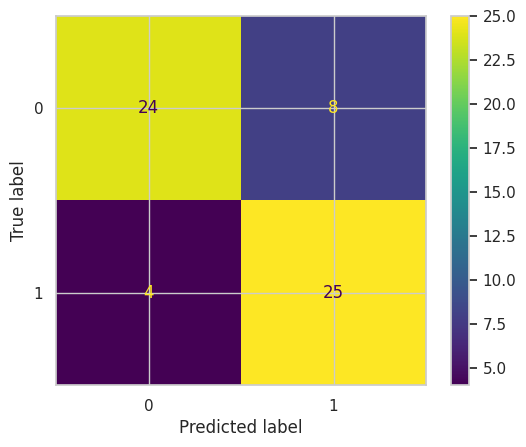

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

The accuracy of .80 indicates that the model is performing okay, but could maybe be improved upon. Looking at the 1 category, the category indicating the presence of heart disease in a patient, a recall of .86 is pretty good I would say. This means that most of the time true positives are being correctly labeled as opposed to there being a high number of false negatives.
<br/><br/>
Below are some of my attempts to improve the accuracy score, but I found out that if I removed any features, the model would always perform worse. I tried many avenues of hyperparamter tuning, such as using grid search to choose the best parameters, but it just provided the same score.
<br/><br/>
See that below:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

#classification report for best_model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best Parameters: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



I then tried to select the best features by using PCA, which would hopefully reduce dimensionality, but the model performed worse, with a lower accuracy and recall score.
<br/><br/>
See Below:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

#classification report for PCA
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61

Selected Features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'fbs_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'ca_1', 'ca_2', 'ca_3', 'ca_4']
Model with Selected Features Accuracy: 0.7704918032786885
Model with RFE Features Accuracy: 0.8032786885245902


Next, I decided to try a different model, and selected a neural network with three hidden layers using ReLU activation and a sigmoid layer for the output. My hope was that by choosing a neural network it may be able to find more complex patterns in the data. After some research, to avoid overfitting, dropout layers and L2 regularization were used. Batch normalization was also used to help with the training process (suggested by ChatGPT). I chose to go with Adam as my optimizer since, after research, that seemed to be the best option for binary classification. This is because Adam will adapt the rate of learning for each of the parameters during training, which will help when converging. I trained the model for 100 epochs, but had early stoppage if the loss values were getting too high, and the data set was split into 80% training and 20% testing.
<br/><br/>
Below is the training code for the Neural Network:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the improved neural network model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.4129 - loss: 1.6721 - val_accuracy: 0.6122 - val_loss: 1.2530 - learning_rate: 0.0010
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4548 - loss: 1.4471 - val_accuracy: 0.6327 - val_loss: 1.2426 - learning_rate: 0.0010
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4978 - loss: 1.4346 - val_accuracy: 0.5918 - val_loss: 1.2340 - learning_rate: 0.0010
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5347 - loss: 1.4422 - val_accuracy: 0.6122 - val_loss: 1.2280 - learning_rate: 0.0010
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5446 - loss: 1.3753 - val_accuracy: 0.5918 - val_loss: 1.2222 - learning_rate: 0.0010
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5582 - loss: 1.3528 - val_accuracy: 0.6327 - val_loss: 1.2171 - learning_rate: 0.0010
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6399 - loss: 1.2717 - val_accuracy: 0.6122 - val

I will evaluate my Neural Network using the same metrics as my Logistic Regression model. This will allow for easier comparison.
<br/><br/>
Below is the classification report for the Neural Network:

In [ ]:
# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Below is the confusion matrix for a visual representation:

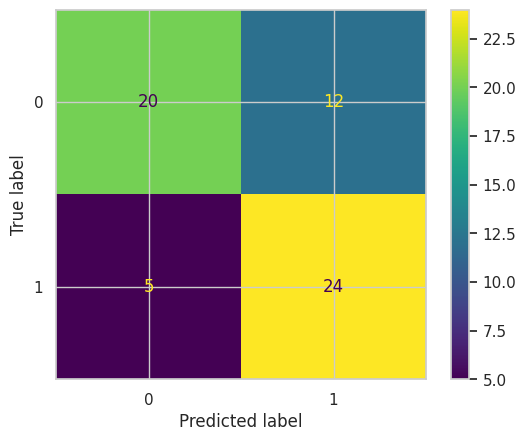

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

As can be seen from the confusion matrix, the number of false negatives is kept to a minimum, which is a good sign, as it means that a diagnosis is not missed very often, but as can be seen from the top right square, there are quite a bit of false positives.

Originally, I only had two layers, and no batch normalization or l2 regularization, and I tried using the optimizer sgd. I also trained it for only 50 epochs. Needless to say, this version performed worse on average.

In [ ]:
# Define features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4429 - loss: 0.7305 - val_accuracy: 0.6327 - val_loss: 0.6847
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5077 - loss: 0.7091 - val_accuracy: 0.5918 - val_loss: 0.6768
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5557 - loss: 0.6762 - val_accuracy: 0.5918 - val_loss: 0.6685
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4707 - loss: 0.6993 - val_accuracy: 0.6122 - val_loss: 0.6605
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5300 - loss: 0.6928 - val_accuracy: 0.6735 - val_loss: 0.6531
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5084 - loss: 0.6934 - val_accuracy: 0.6735 - val_loss: 0.6467
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5682 - loss: 0.6729 - val_accuracy: 0.6939 - val_loss: 0.6409
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6009 - loss: 0.6752 - val_accuracy: 0.7551 - val_loss: 0.6355


Below is the classification report for this first version:

In [ ]:
# Make predictions
y_pred_oldnn = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_oldnn))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.67      0.83      0.74        29

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



### Performance Evaluation


The Neural Network achieved an accuracy of 85%, while the Logistic Regression model achieved 80%. The accuracy indicates the proportion of correct predictions, positive or negative, so the models performed well, but there is possibly still room for improvement. The recall score was higher for both categories in the Neural Network as well, being 81% for category 0 and 89% for category 1. For the Logistic Regression model, the recall was 75% for the category 0 and the recall for category 1 was 86%. As mentioned previously, recall measures the true positive rate, and since diagnosing a severe medical problem such as heart disease, if the patient does indeed have it, is critical. I would say this makes sense to me, as the Neural Network may be able to notice non-linear patterns in the data, improving its effectiveness. But I will say, the Logistic Regression model is definitely more consistent, as it will always produce the same accuracy score. With the Neural Network, it bounces around because different runs of the 100 epochs produce different results, some of these being worse than the Logistic Regression model. For further improvement on the accuracy scores, I may try to go with another model that uses Gradient Boosting, like XGBoost, to see if that would perform better.

## Challenges to Overcome

One major challenge I faced initially had to do with my Logistic Regression model. In the beginning,
I tried many avenues of hyperparameter tuning as mentioned previously, such as using gridsearch to
search for the best parameters to using for my model as well as PCA, but all of my efforts resulted
in worse performance for my model (some of the later attempts were removed for conciseness). So after
pondering for a better solution, I went with what seemed to be the simplest one, and that was do what
was performing the best. So I went with the baseline model to overcome this challenge, as well as
making an attempt at a different model, the Neural Network. Initially I did not set out to make
multiple models, but since my attempts at improvement for the Logistic Regression model were unsuccessful,
I went with this avenue.

Another challenge was that initially, my Neural Network was performing way below the Logistic Regression
model in accuracy, as I only had two layers, and I tried using the optimizer sgd. After further study,
to help my model with the complexity, I decided to switch my optimizer to Adam, as I found that to be
the best optimizer for binary classification tasks, as well as add another layer to the Network. This,
along with L2 regularization and batch normalization helped this version perform better than the last.

In spite of these efforts to increase the accuracy, I believe training instability is an issue with the
Neural Network model. Different runs showed substantial variability in the accuracy and recall scores.

I believe future work could benefit from exploring a model that uses Gradient Boost, like XGBoost, as
mentioned previously (see Comparison Section in Model Selection and Training). I also believe that it
could benefit from trying to expand the data I am working with, since after removing duplicates, my
data may limit my model's ability to generalize well.

